In [8]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('data_with_groups.csv')

In [10]:
data.head()

,Unnamed: 0,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION,join_key,MCC,GROUP
0,0,2,Department of Mental Health,2009/01/05 05:00:00+00,229.50,WW GRAINGER 912,DC,industrialsuppliesnotelsewhereclassified,industrialsuppliesnotelsewhereclassified,5085.0,Retail outlets
1,1,3,District Department of Transportation,2009/01/05 05:00:00+00,3147.33,BRANCH SUPPLY,DC,stationeryofficeandschoolsupplystores,stationerystoresofficeandschoolsupplystores,5943.0,Miscellaneous outlets
2,2,4,Department of Youth Rehabilitation Services,2009/01/05 05:00:00+00,54.00,VIDEO MONITORING SRVCS,NY,motionpicturesvideotapeproductionanddistribution,motionpictureandvideotapeproductionanddistribu...,7829.0,Amusement and entertainment
3,3,5,Office of Employee Appeals,2009/01/05 05:00:00+00,137.35,STAPLES 00102186,DC,stationeryofficesuppliesprintingwritingpaper,stationeryofficesuppliesprintingandwritingpaper,5111.0,Retail outlets
4,4,6,Office of Police Complaints,2009/01/06 05:00:00+00,1340.80,FAITH MGMT CONSULTING,DC,stationeryofficeandschoolsupplystores,stationerystoresofficeandschoolsupplystores,5943.0,Miscellaneous outlets


REMOVE NUMBERS IN VENDOR NAME

In [11]:
#data["VENDOR_NAME"] = data["VENDOR_NAME"].str.replace('\d+', '')

In [12]:
data['TRANSACTION_DATE_2'] = data['TRANSACTION_DATE'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y/%m/%d %H:%M:%S+%f'))


In [13]:
data['MONTH'] = data['TRANSACTION_DATE_2'].apply(lambda x: x.month)
data['YEAR'] = data['TRANSACTION_DATE_2'].apply(lambda x: x.year)


In [51]:
new4 = data.groupby(['AGENCY',"MONTH","YEAR"]).count().groupby(['AGENCY']).agg({"TRANSACTION_AMOUNT" : ['mean']})

AttributeError: module 'matplotlib.axes' has no attribute 'set_xlabell'

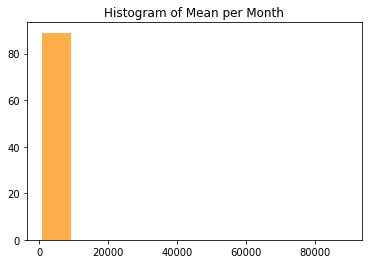

In [52]:
import matplotlib.axes as Axes
mean_spent_per_month = new4["TRANSACTION_AMOUNT",'mean'] #data.groupby(['AGENCY', 'MONTH', 'YEAR']).mean().TRANSACTION_AMOUNT
binds = [x*10000 for x in range(0,10)]
plt.hist(mean_spent_per_month,bins = binds, color='#FF8C00',
                            alpha=0.7, rwidth=0.85)
plt.title('Histogram of Mean per Month')
Axes.set_xlabell('Number of Agencies')


Text(0.5, 1.0, 'Histogram of Orders per Month')

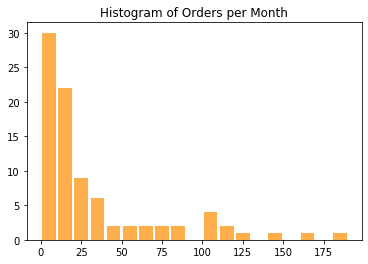

In [59]:

mean_spent_per_month = new4["TRANSACTION_AMOUNT",'mean']
binds = [x*10 for x in range(0,20)]
plt.hist(mean_spent_per_month, bins = binds, color='#FF8C00',
                            alpha=0.7, rwidth=0.85)
plt.title('Histogram of Orders per Month')

In [50]:
#mean and count per month
data.groupby(['GROUP', 'VENDOR_NAME',"MONTH","YEAR"]).sum().groupby(['GROUP','VENDOR_NAME']).agg({"TRANSACTION_AMOUNT" : ['mean','count']})

TRANSACTION_AMOUNT      
                                                           mean count
GROUP                 VENDOR_NAME                                    
Agricultural services ADAMS MORGAN ANIMAL CL        1163.677727    22
                      ADAMS MORGAN ANIMAL HO         922.299231    13
                      ADAMS MORGAN ANIMALQPS        1158.400000     1
                      ADIRONDACK TREE EXPERT      188187.500000     2
                      AGGTRANS                      4982.310000     1
...                                                         ...   ...
Utilities             WWW.LOGMEIN.COM               2126.911667    12
                      WWW.SEIDIO.COM                1038.060000     1
                      XCELTWRCNTR                    726.000000     1
                      ZAGG                           429.173750    16
                      ZAPEVENT EVENT REG            1200.000000     1

[39034 rows x 2 columns]

In [49]:
(data[data.VENDOR_NAME == "ADAMS MORGAN ANIMAL CL"].groupby(['GROUP', 'VENDOR_NAME',"MONTH","YEAR"]).sum())["TRANSACTION_AMOUNT"].mean()
#test[test.iloc("VENDOR_NAME" == "ADAMS MORGAN ANIMAL CL")].mean()

1163.6777272727272

In [54]:
#gives sum and number of orders in total per vendor to get average cost per order 
new = data.groupby(['GROUP', 'VENDOR_NAME']).agg({"TRANSACTION_AMOUNT" : ['sum','count']})
new["TRANSACTION_AMOUNT","average"] = new["TRANSACTION_AMOUNT","sum"]/new["TRANSACTION_AMOUNT","count"]
new.head()

TRANSACTION_AMOUNT        \
                                                            sum count   
GROUP                 VENDOR_NAME                                       
Agricultural services ADAMS MORGAN ANIMAL CL           25600.91    25   
                      ADAMS MORGAN ANIMAL HO           11989.89    21   
                      ADAMS MORGAN ANIMALQPS            1158.40     2   
                      ADIRONDACK TREE EXPERT          376375.00     9   
                      AGGTRANS                          4982.31     3   

                                                            
                                                   average  
GROUP                 VENDOR_NAME                           
Agricultural services ADAMS MORGAN ANIMAL CL   1024.036400  
                      ADAMS MORGAN ANIMAL HO    570.947143  
                      ADAMS MORGAN ANIMALQPS    579.200000  
                      ADIRONDACK TREE EXPERT  41819.444444  
                      AGGTRANS                 1660.770000

In [71]:
import numpy as np

#(data.groupby(['GROUP', 'VENDOR_NAME',"YEAR","MONTH"]).agg({"TRANSACTION_AMOUNT" : ['sum','count']}))
new2 = data.groupby(['GROUP', 'VENDOR_NAME']).agg({'TRANSACTION_DATE_2' : ['min','max']})

#find difference between min and max 
new2["TRANSACTION_DATE_2", "time_diff"] = (new2["TRANSACTION_DATE_2", "max"] - new2["TRANSACTION_DATE_2", "min"])/np.timedelta64(1, 'M')

#round up months and put zeros as 1
new2["TRANSACTION_DATE_2", "time_diff"] = new2["TRANSACTION_DATE_2", "time_diff"].apply(np.ceil).replace(0,1)


In [72]:
new2

TRANSACTION_DATE_2  \
                                                             min   
GROUP                 VENDOR_NAME                                  
Agricultural services ADAMS MORGAN ANIMAL CL 2013-11-21 05:00:00   
                      ADAMS MORGAN ANIMAL HO 2009-10-13 04:00:00   
                      ADAMS MORGAN ANIMALQPS 2010-10-04 04:00:00   
                      ADIRONDACK TREE EXPERT 2012-07-16 04:00:00   
                      AGGTRANS               2016-12-09 05:00:00   
...                                                          ...   
Utilities             WWW.LOGMEIN.COM        2011-10-24 04:00:00   
                      WWW.SEIDIO.COM         2009-12-24 05:00:00   
                      XCELTWRCNTR            2010-11-02 04:00:00   
                      ZAGG                   2011-08-12 04:00:00   
                      ZAPEVENT EVENT REG     2014-04-18 04:00:00   

                                                                            
                                                             max time_diff  
GROUP                 VENDOR_NAME                                           
Agricultural services ADAMS MORGAN ANIMAL CL 2020-10-23 04:00:00      84.0  
                      ADAMS MORGAN ANIMAL HO 2012-09-21 04:00:00      36.0  
                      ADAMS MORGAN ANIMALQPS 2010-10-12 04:00:00       1.0  
                      ADIRONDACK TREE EXPERT 2012-11-08 05:00:00       4.0  
                      AGGTRANS               2016-12-12 05:00:00       1.0  
...                                                          ...       ...  
Utilities             WWW.LOGMEIN.COM        2016-04-14 04:00:00      54.0  
                      WWW.SEIDIO.COM         2009-12-24 05:00:00       1.0  
                      XCELTWRCNTR            2010-11-23 05:00:00       1.0  
                      ZAGG                   2013-03-26 04:00:00      20.0  
                      ZAPEVENT EVENT REG     2014-04-18 04:00:00       1.0  

[39034 rows x 3 columns]

In [82]:
new3 = pd.concat([new,new2],axis =1)
#number of orders per month
new3["THINGS_WE_WANT","ORDERS_PER_MONTH"] = new3["TRANSACTION_AMOUNT","count"]/new3["TRANSACTION_DATE_2","time_diff"]
#net money per month
new3["THINGS_WE_WANT","NET_MONEY_PER_MONTH"] = new3["TRANSACTION_AMOUNT","sum"]/new3["TRANSACTION_DATE_2","time_diff"]
new3

TRANSACTION_AMOUNT        \
                                                            sum count   
GROUP                 VENDOR_NAME                                       
Agricultural services ADAMS MORGAN ANIMAL CL           25600.91    25   
                      ADAMS MORGAN ANIMAL HO           11989.89    21   
                      ADAMS MORGAN ANIMALQPS            1158.40     2   
                      ADIRONDACK TREE EXPERT          376375.00     9   
                      AGGTRANS                          4982.31     3   
...                                                         ...   ...   
Utilities             WWW.LOGMEIN.COM                  25522.94    16   
                      WWW.SEIDIO.COM                    1038.06     1   
                      XCELTWRCNTR                        726.00     2   
                      ZAGG                              6866.78    32   
                      ZAPEVENT EVENT REG                1200.00     1   

                                                            \
                                                   average   
GROUP                 VENDOR_NAME                            
Agricultural services ADAMS MORGAN ANIMAL CL   1024.036400   
                      ADAMS MORGAN ANIMAL HO    570.947143   
                      ADAMS MORGAN ANIMALQPS    579.200000   
                      ADIRONDACK TREE EXPERT  41819.444444   
                      AGGTRANS                 1660.770000   
...                                                    ...   
Utilities             WWW.LOGMEIN.COM          1595.183750   
                      WWW.SEIDIO.COM           1038.060000   
                      XCELTWRCNTR               363.000000   
                      ZAGG                      214.586875   
                      ZAPEVENT EVENT REG       1200.000000   

                                              TRANSACTION_DATE_2  \
                                                             min   
GROUP                 VENDOR_NAME                                  
Agricultural services ADAMS MORGAN ANIMAL CL 2013-11-21 05:00:00   
                      ADAMS MORGAN ANIMAL HO 2009-10-13 04:00:00   
                      ADAMS MORGAN ANIMALQPS 2010-10-04 04:00:00   
                      ADIRONDACK TREE EXPERT 2012-07-16 04:00:00   
                      AGGTRANS               2016-12-09 05:00:00   
...                                                          ...   
Utilities             WWW.LOGMEIN.COM        2011-10-24 04:00:00   
                      WWW.SEIDIO.COM         2009-12-24 05:00:00   
                      XCELTWRCNTR            2010-11-02 04:00:00   
                      ZAGG                   2011-08-12 04:00:00   
                      ZAPEVENT EVENT REG     2014-04-18 04:00:00   

                                                                            \
                                                             max time_diff   
GROUP                 VENDOR_NAME                                            
Agricultural services ADAMS MORGAN ANIMAL CL 2020-10-23 04:00:00      84.0   
                      ADAMS MORGAN ANIMAL HO 2012-09-21 04:00:00      36.0   
                      ADAMS MORGAN ANIMALQPS 2010-10-12 04:00:00       1.0   
                      ADIRONDACK TREE EXPERT 2012-11-08 05:00:00       4.0   
                      AGGTRANS               2016-12-12 05:00:00       1.0   
...                                                          ...       ...   
Utilities             WWW.LOGMEIN.COM        2016-04-14 04:00:00      54.0   
                      WWW.SEIDIO.COM         2009-12-24 05:00:00       1.0   
                      XCELTWRCNTR            2010-11-23 05:00:00       1.0   
                      ZAGG                   2013-03-26 04:00:00      20.0   
                      ZAPEVENT EVENT REG     2014-04-18 04:00:00       1.0   

                                               THINGS_WE_WANT  \
                                          

In [86]:
new3.to_csv("eda_prep.csv")